In [12]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('parkinsons.data')

NameError: name 'pd' is not defined

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
df.size

4680

In [ ]:
df.shape

(195, 24)

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
df['status'].unique()

array([1, 0])

In [ ]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

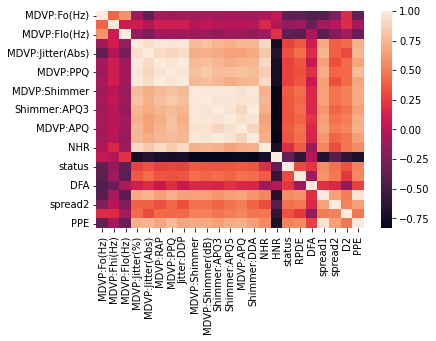

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Seperating features and target label

In [ ]:
features = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]
target = df['status']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['status']

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  74.35897435897436
              precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81        31

    accuracy                           0.74        39
   macro avg       0.70      0.79      0.70        39
weighted avg       0.85      0.74      0.77        39



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.71794872, 0.87179487, 0.84615385, 0.58974359, 0.71794872])

### Saving trained Decision Tree model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.5897435897435898
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         8
           1       1.00      0.48      0.65        31

    accuracy                           0.59        39
   macro avg       0.67      0.74      0.58        39
weighted avg       0.86      0.59      0.62        39



In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.66666667, 0.71794872, 0.82051282, 0.69230769, 0.58974359])

### Saving trained Guassian Naive Bayes model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.91      1.00      0.95        31

    accuracy                           0.92        39
   macro avg       0.96      0.81      0.86        39
weighted avg       0.93      0.92      0.92        39



In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.74358974])

In [ ]:
#Saving trained SVM model

In [ ]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.8717948717948718
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39



In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.94871795, 0.79487179, 0.87179487, 0.76923077, 0.74358974])

### Saving trained Logistic Regression model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.8205128205128205
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.93      0.84      0.88        31

    accuracy                           0.82        39
   macro avg       0.74      0.79      0.76        39
weighted avg       0.85      0.82      0.83        39



In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.79487179, 0.84615385, 0.79487179, 0.71794872, 0.71794872])

### Saving trained Random Forest model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
import joblib

In [ ]:
filename = 'rf_model.sav'
joblib.dump(RF, filename)

['rf_model.sav']

In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.score(Xtest, Ytest)
print(result)

0.8205128205128205


# XGBoost

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[15:17:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.8205128205128205
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.93      0.84      0.88        31

    accuracy                           0.82        39
   macro avg       0.74      0.79      0.76        39
weighted avg       0.85      0.82      0.83        39



In [ ]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

[15:17:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:17:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:17:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:17:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

array([0.82051282, 0.79487179, 0.97435897, 0.74358974, 0.74358974])

### Saving trained XGBoost model

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [ ]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(XB, 'xg_boost_recomondation.pkl')
 
# Load the model from the file
knn_from_joblib = joblib.load('xg_boost_recomondation.pkl')
 
# Use the loaded model to make predictions

## Accuracy Comparison

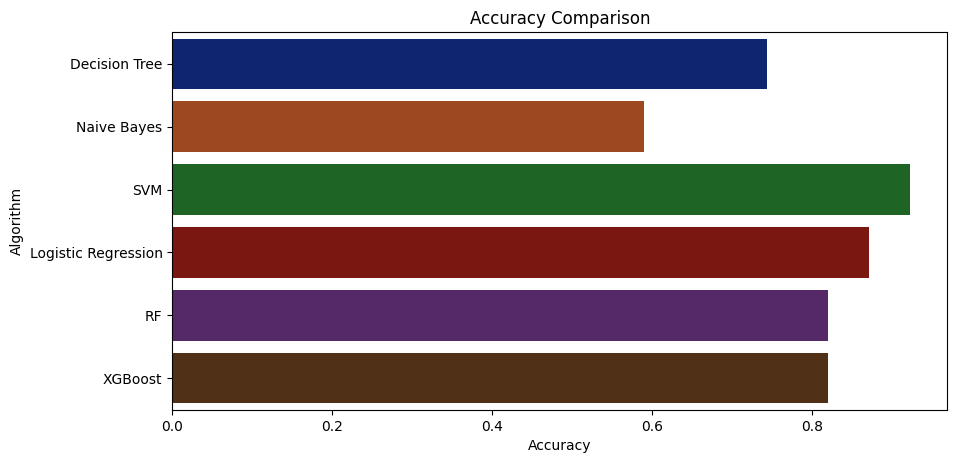

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.7435897435897436
Naive Bayes --> 0.5897435897435898
SVM --> 0.9230769230769231
Logistic Regression --> 0.8717948717948718
RF --> 0.8205128205128205
XGBoost --> 0.8205128205128205


## Making a prediction

In [ ]:
Xtest[0:1]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
10,88.333,112.24,84.072,0.00505,0.00006,0.00254,0.0033,0.00763,0.02143,0.197,...,0.01892,0.03237,0.01166,21.118,0.611137,0.776156,-5.24977,0.391002,2.407313,0.24974


In [ ]:
Xtest[0:1].values

array([[ 8.833300e+01,  1.122400e+02,  8.407200e+01,  5.050000e-03,
         6.000000e-05,  2.540000e-03,  3.300000e-03,  7.630000e-03,
         2.143000e-02,  1.970000e-01,  1.079000e-02,  1.342000e-02,
         1.892000e-02,  3.237000e-02,  1.166000e-02,  2.111800e+01,
         6.111370e-01,  7.761560e-01, -5.249770e+00,  3.910020e-01,
         2.407313e+00,  2.497400e-01]])

In [ ]:
testing_input=list(Xtest[6:7].values[0])

In [ ]:
data = np.array([testing_input])
prediction = RF.predict(data)
print(prediction)

[0]


In [ ]:
Ytest

10     1
79     1
164    1
142    1
186    0
133    1
35     0
137    1
25     1
2      1
12     1
128    1
144    1
3      1
48     0
29     1
14     1
119    1
6      1
23     1
108    1
143    1
129    1
174    0
45     0
120    1
173    0
125    1
9      1
163    1
54     1
13     1
109    1
194    0
78     1
114    1
44     0
82     1
158    1
Name: status, dtype: int64